In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
pip install split-Folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders

In [6]:
input_folder = '/content/drive/MyDrive/SBP/DATASET'

In [7]:
splitfolders.ratio(input_folder, output='/content/drive/MyDrive/SBP/DATASET2', seed=42, ratio=(.7, .2, .1), group_prefix=None) 

Copying files: 3245 files [00:29, 109.43 files/s]


In [8]:
base_dir = '/content/drive/MyDrive/SBP/DATASET2'
!ls = '/content/drive/MyDrive/SBP/DATASET2'

ls: cannot access '=': No such file or directory
/content/drive/MyDrive/SBP/DATASET2:
test  train  val


In [9]:
train_dir =  os.path.join(base_dir, 'train')    #Direktori Train
validation_dir = os.path.join(base_dir, 'val')  #Direktori Vaildation
test_dir =  os.path.join(base_dir, 'test')      #Direktori untuk testing

In [42]:
# Memberikan nilai awal untuk batch size, ukuran gambar dan jumlah epochs

BATCH_SIZE = 64  #Variabel Batch Size sebesar 64 artinya proses akan dilakukan per 64 gambar untuk satu putaran
IMG_HEIGHT = 150 # Ukuran Tinggi Gambar
IMG_WIDHT = 150  # Ukuran Lebar Gambar
epochs = 32  

In [27]:
train_dataset = image_dataset_from_directory(train_dir,                 # Memanggil Direktori Train
                                             shuffle=True,              # Aktifasi Pengacakan
                                             batch_size=BATCH_SIZE,     # 64 Batch Size
                                             label_mode="categorical",  # Mode Categorical digunakan karena data kami merupakan data multiclass
                                             color_mode='rgb',          # Mode warna RGB
                                             image_size=(IMG_HEIGHT, IMG_WIDHT)) # Pengaturan image size

validation_dataset = image_dataset_from_directory(validation_dir,       # Memanggil Direktori Val
                                             shuffle=True,              # Aktifasi Pengacakan
                                             batch_size=BATCH_SIZE,     # 64 Batch Size
                                             label_mode="categorical",  # Mode Categorical digunakan karena data kami merupakan data multiclass
                                             color_mode='rgb',          # Mode warna RGB
                                             image_size=(IMG_HEIGHT, IMG_WIDHT)) # Pengaturan image size

test_dataset = image_dataset_from_directory(test_dir,                   # Memanggil Direktori test
                                             shuffle=True,              # Aktifasi Pengacakan
                                             batch_size=BATCH_SIZE,     # 64 Batch Size
                                             label_mode="categorical",  # Label Mode menggunakan categorical karena multiclass
                                             color_mode='rgb',          # Mode warna RGB
                                             image_size=(IMG_HEIGHT, IMG_WIDHT))# Pengaturan image size

Found 2269 files belonging to 8 classes.
Found 647 files belonging to 8 classes.
Found 329 files belonging to 8 classes.


In [28]:
class_names = train_dataset.class_names
print(class_names)

['Cacar Air', 'Herpes', 'Impetigo', 'Kurap', 'Kutil', 'Melanoma', 'Psoriasis', 'Vitiligo']


In [29]:
from pathlib import Path
import imghdr

data_dir = '/content/drive/MyDrive/SBP/DATASET2'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

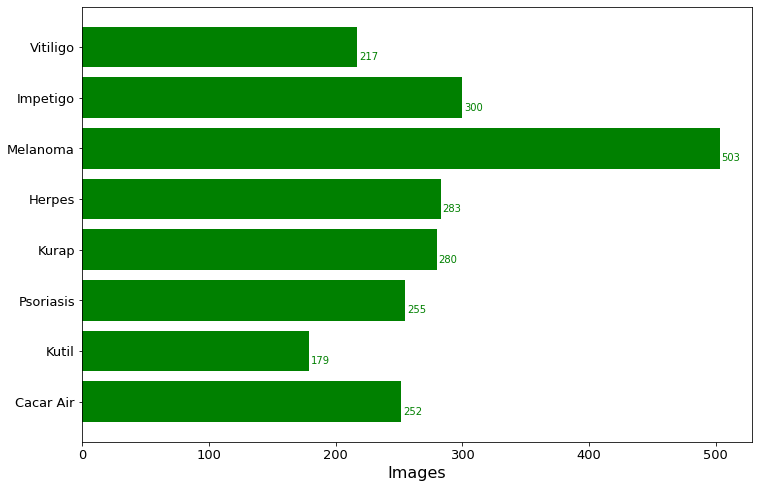

In [30]:
# Melihat distribusi data dan plotting gambar dari folder train

main= train_dir

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
    
  
keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values] # Bagannya akan berubah menjadi merah jika jumlah data kurang dari 150
fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

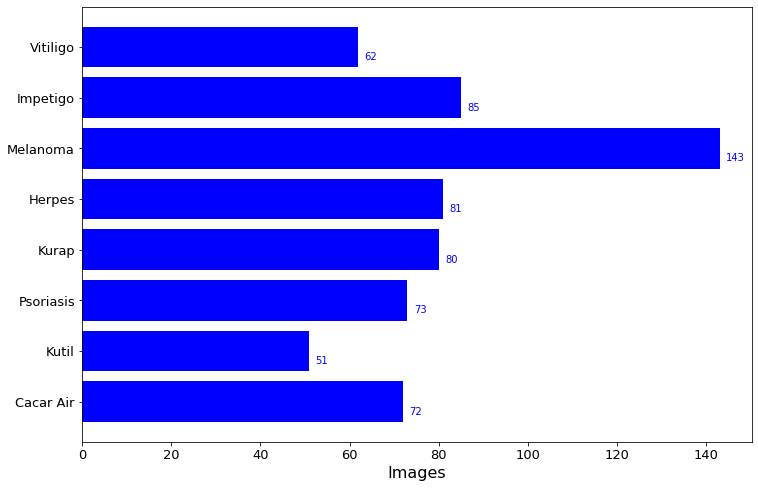

In [31]:
# Melihat distribusi data dari folder validation

main = validation_dir

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
    
  
keys = data.keys()
values = data.values()

colors=["blue" if x<= 150 else "green" for x in values] # Bagannya akan berubah menjadi hijau jika jumlah data lebih dari 150

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [32]:
# Memodifikasi gambar dengan menggunakan Augmentasi
# Melakukan Random flip horizontal, random rotatiom dan random zoom

data_augmentation = Sequential(
    [
     RandomFlip(input_shape=(IMG_HEIGHT, IMG_WIDHT, 3), mode="horizontal"),
     RandomRotation(0.1), 
     RandomZoom(0.1),
    
    ]
    , name="Argumentation" # Pemberian nama variabel
)

In [33]:
data_augmentation.summary() 

Model: "Argumentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Menggunakan AUTOTUNE keras

AUTOTUNE = tf.data.experimental.AUTOTUNE 
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Buffersize per 1000 gambar acak dituning untuk train data
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Buffersize per 1000 gambar acak dituning untuk validation data
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Buffersize per 1000 gambar acak dituning untuk test data

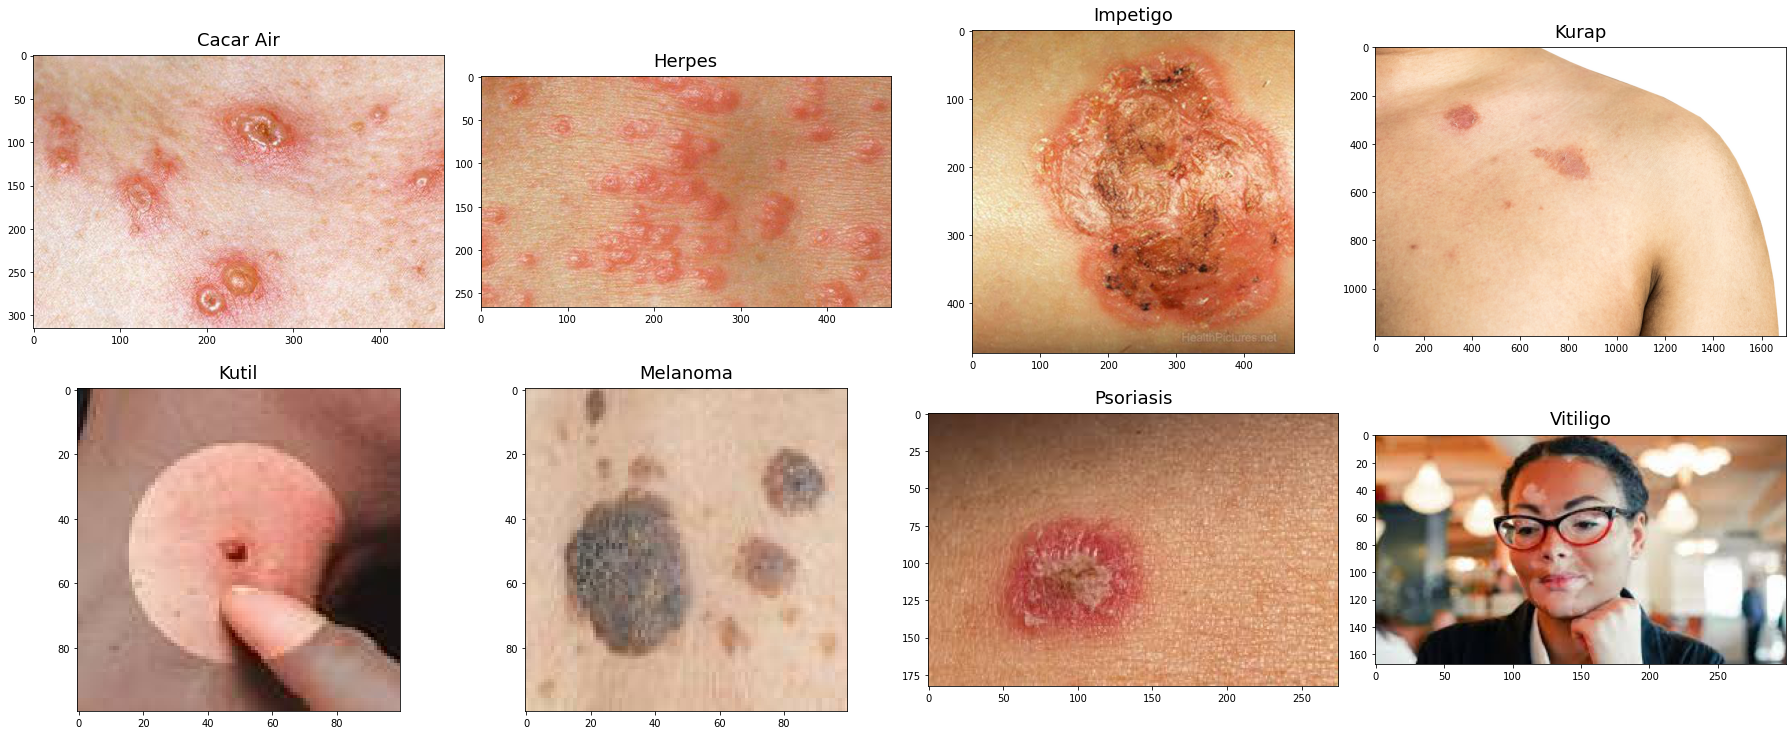

In [35]:
#Melihat distribusi gambar dan labeling

import random
train_folder = train_dir #Membuat variabel baru dengan nama train_folder
images = []

for food_folder in sorted(os.listdir(train_folder)): # Perulangan untuk disetiap food folder yang didefinisikan sebagai train folder
    food_items = os.listdir(train_folder + '/' + food_folder) # Masukkan food items
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

# Melakukan Plotting dan visualisasi gambar     

fig=plt.figure(1, figsize=(25, 25)) 

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

In [36]:
# Menambahkan beberapa library yang diperlukan

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.losses import BinaryCrossentropy 
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import math

In [43]:
# Menggunakan learning rate untuk menghitung nilai koreksi bobot pada saat train

learning_rate_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, 
                                                                         decay_steps=2, 
                                                                         decay_rate=1e-6, 
                                                                         staircase=False)

In [44]:
# Membuat Model dengan menggunakan transfer learning DenseNet201

from tensorflow.keras.layers import (
    BatchNormalization, Activation, Dropout, Dense, Conv2D
)

base_densenet_model = Sequential([
                       Rescaling(input_shape=(IMG_HEIGHT, IMG_WIDHT, 3), scale=1.0/255, name="Rescaling"), # Preprocessing dengan cara mormalisasi gambar dengan membagi 255
                       data_augmentation, # Menambahkan Augmentasi yang telah dibuat tadi
                       DenseNet201(input_shape=(IMG_WIDHT, IMG_HEIGHT, 3), weights="imagenet", include_top=False) # Masukkan transfer learning dan masukkan inputshape sesuai dengan ukuran gambar serta bobot ImageNet
], name="base_densenet_model") # Pemberian nama pada model

base_densenet_model.trainable = False
base_densenet_model.summary() # Melihat Summary model

custom_densenet_model = Sequential([ # Gunakan model sequential yang telah diimport di tensorflow
        base_densenet_model,         # Masukkan model dasar tadi
        BatchNormalization(), 
        GlobalAveragePooling2D(), 
        Dense(128, activation = 'relu'),   # Fully connected layer Dense 128 filter layout dengan aktivasi relu
        Dropout(0.1),                      # Gunakan dropout sebanyak 0.2 untuk mitigasi overfitting
        Dense(8, activation="softmax")    # Masukkan sesuai class yang digunakan disini kami memiliki 15 class 
        ], name = "custom.densenet_model") # Pemberian nama nama model

Model: "base_densenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 Argumentation (Sequential)  (None, 150, 150, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
Total params: 18,321,984
Trainable params: 0
Non-trainable params: 18,321,984
_________________________________________________________________


In [39]:
# Melihat Summary model

custom_densenet_model.summary()

Model: "custom.densenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_densenet_model (Sequen  (None, 4, 4, 1920)       18321984  
 tial)                                                           
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 1920)       7680      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               245888    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                             

In [45]:
# Melakukan Compiling model menggunakan optimizer, Loss dan metrics yang sesuai

adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
custom_densenet_model.compile(optimizer='adam', 
                              loss= 'categorical_crossentropy', 
                              metrics=['accuracy']  
                              )

In [46]:
 # Melakukan training model

history = custom_densenet_model.fit(     # Training data
    train_dataset,                       # Masukkan data yang akan di train yaitu train dataset
    validation_data=validation_dataset,  # Masukkan data yang akan di validasi yaitu validation dataset
    epochs= epochs,                      # Masukkan epoch sebanyak 10 kali
    verbose=1                            # Verbose
)

Epoch 1/32
71/71 [==============================] - 22s 155ms/step - loss: 1.4163 - accuracy: 0.5033 - val_loss: 1.1620 - val_accuracy: 0.5781
Epoch 2/32
71/71 [==============================] - 8s 115ms/step - loss: 0.9123 - accuracy: 0.6822 - val_loss: 1.0835 - val_accuracy: 0.6306
Epoch 3/32
71/71 [==============================] - 8s 113ms/step - loss: 0.7286 - accuracy: 0.7475 - val_loss: 1.0247 - val_accuracy: 0.6321
Epoch 4/32
71/71 [==============================] - 8s 114ms/step - loss: 0.6209 - accuracy: 0.7893 - val_loss: 1.0047 - val_accuracy: 0.6662
Epoch 5/32
71/71 [==============================] - 9s 125ms/step - loss: 0.5307 - accuracy: 0.8105 - val_loss: 1.0389 - val_accuracy: 0.6615
Epoch 6/32
71/71 [==============================] - 8s 115ms/step - loss: 0.4680 - accuracy: 0.8444 - val_loss: 0.9942 - val_accuracy: 0.6770
Epoch 7/32
71/71 [==============================] - 8s 115ms/step - loss: 0.4271 - accuracy: 0.8599 - val_loss: 1.0158 - val_accuracy: 0.6816
Epoch

In [47]:
# Menyimpan Model yang telah di train dengan format .h5

custom_densenet_model.save('SBPFixed_Model.h5')

In [48]:
# Memanggil model yang telah tersimpan

loaded_model = tf.keras.models.load_model('/content/SBPFixed_Model.h5')

In [49]:
# Melakukan Fine Tuning untuk meningkatkan akurasi

fine_tune_at = 150
for layer in loaded_model.layers[:fine_tune_at]:
    layer.trainable = False

loaded_model.compile(
    optimizer=Adam(learning_rate= 0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [50]:
history_tune = loaded_model.fit(
    train_dataset,                      # Masukkan data yang akan di train yaitu train dataset
    validation_data=validation_dataset, # Masukkan data yang akan di validasi yaitu validation dataset
    epochs=3,                           # Masukkan epoch sebanyak 3 untuk training
    
)

Epoch 1/3
71/71 [==============================] - 22s 158ms/step - loss: 0.0950 - accuracy: 0.9705 - val_loss: 1.4358 - val_accuracy: 0.6801
Epoch 2/3
71/71 [==============================] - 8s 114ms/step - loss: 0.0935 - accuracy: 0.9683 - val_loss: 1.4358 - val_accuracy: 0.6801
Epoch 3/3
71/71 [==============================] - 8s 114ms/step - loss: 0.0950 - accuracy: 0.9696 - val_loss: 1.4358 - val_accuracy: 0.6801


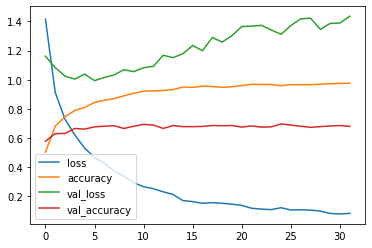

In [51]:
pd.DataFrame(custom_densenet_model.history.history).plot()   # Plotting akurasi,loss,val loss, vall_ accuracy

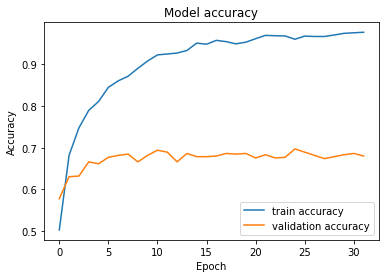

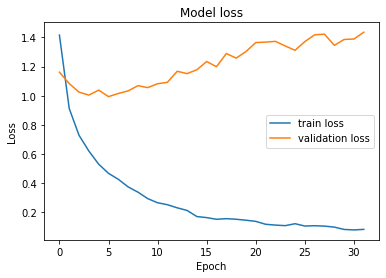

In [52]:
def plot_accuracy(history ):
    
    plt.plot(history .history['accuracy'],label='train accuracy')
    plt.plot(history .history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_Model Dense')
    plt.show()
    
def plot_loss(history ):
    
    plt.plot(history .history['loss'],label="train loss")
    plt.plot(history .history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_Model Dense')
    plt.show()
    
plot_accuracy(history )
plot_loss(history )

In [53]:
# Melakukan evaluasi model yang telah di train terhadap data pengujian

test_accuracy = loaded_model.evaluate(test_dataset)
print("The test akurasi  : ", test_accuracy[1]*100, "%")

11/11 [==============================] - 3s 244ms/step - loss: 1.5347 - accuracy: 0.6748
The test akurasi  :  67.47720241546631 %


In [54]:
# Melihat jumlah Akurasi dan loss pada data validasi

loss, accuracy = loaded_model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)
print('Test loss:', loss)

21/21 [==============================] - 2s 77ms/step - loss: 1.4358 - accuracy: 0.6801
Test accuracy : 0.6800618171691895
Test loss: 1.435823678970337


In [55]:
# Menyimpan Model ke daalam format tflite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()
open("ModelDeploy1.tflite", "wb").write(tflite_model)

73558308

In [ ]:
# Membuat Fungsi Predict untuk download tflite gambar

from google.colab import files
files.download('/content/ModelDeploy1.tflite')

In [58]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image 
from skimage.io import imread
import cv2



model = loaded_model
category={
    0: ['cacar_air', 'Cacar Air'], 1: ['herpes','Herpes'], 2: ['impetigo','Impetigo'],
    3: ['kurap','Kurap'], 4: ['kutil','Kutil'], 5: ['melanoma','Melanoma'],
    6: ['psoriasis','Psoriasis'], 7: ['vitiligo','Vitiligo']
}

# Fungsi untuk memprediksi gambar ( hanya 1 file )
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 1.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediksi Gambar ini adalah - {}  ".format(category[index][1]))
    plt.imshow((img_array*1).astype(np.uint8))
    
    
# Fungsi untuk memprediksi gambar ( untuk 1 folder/direktori )  
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    fig=plt.figure(1, figsize=(25, 25))
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(150, 150))
        img_array = image.img_to_array(img_)
        
        img_processed = np.expand_dims(img_array, axis=0) 

        img_processed /= 1.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)[0]
        if pred==true:
            pos+=1
        
        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow((img_array*1).astype(np.uint8))

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

1/1 [==============================] - 0s 37ms/step
Accuracy of Test : 0.00 (0/73)


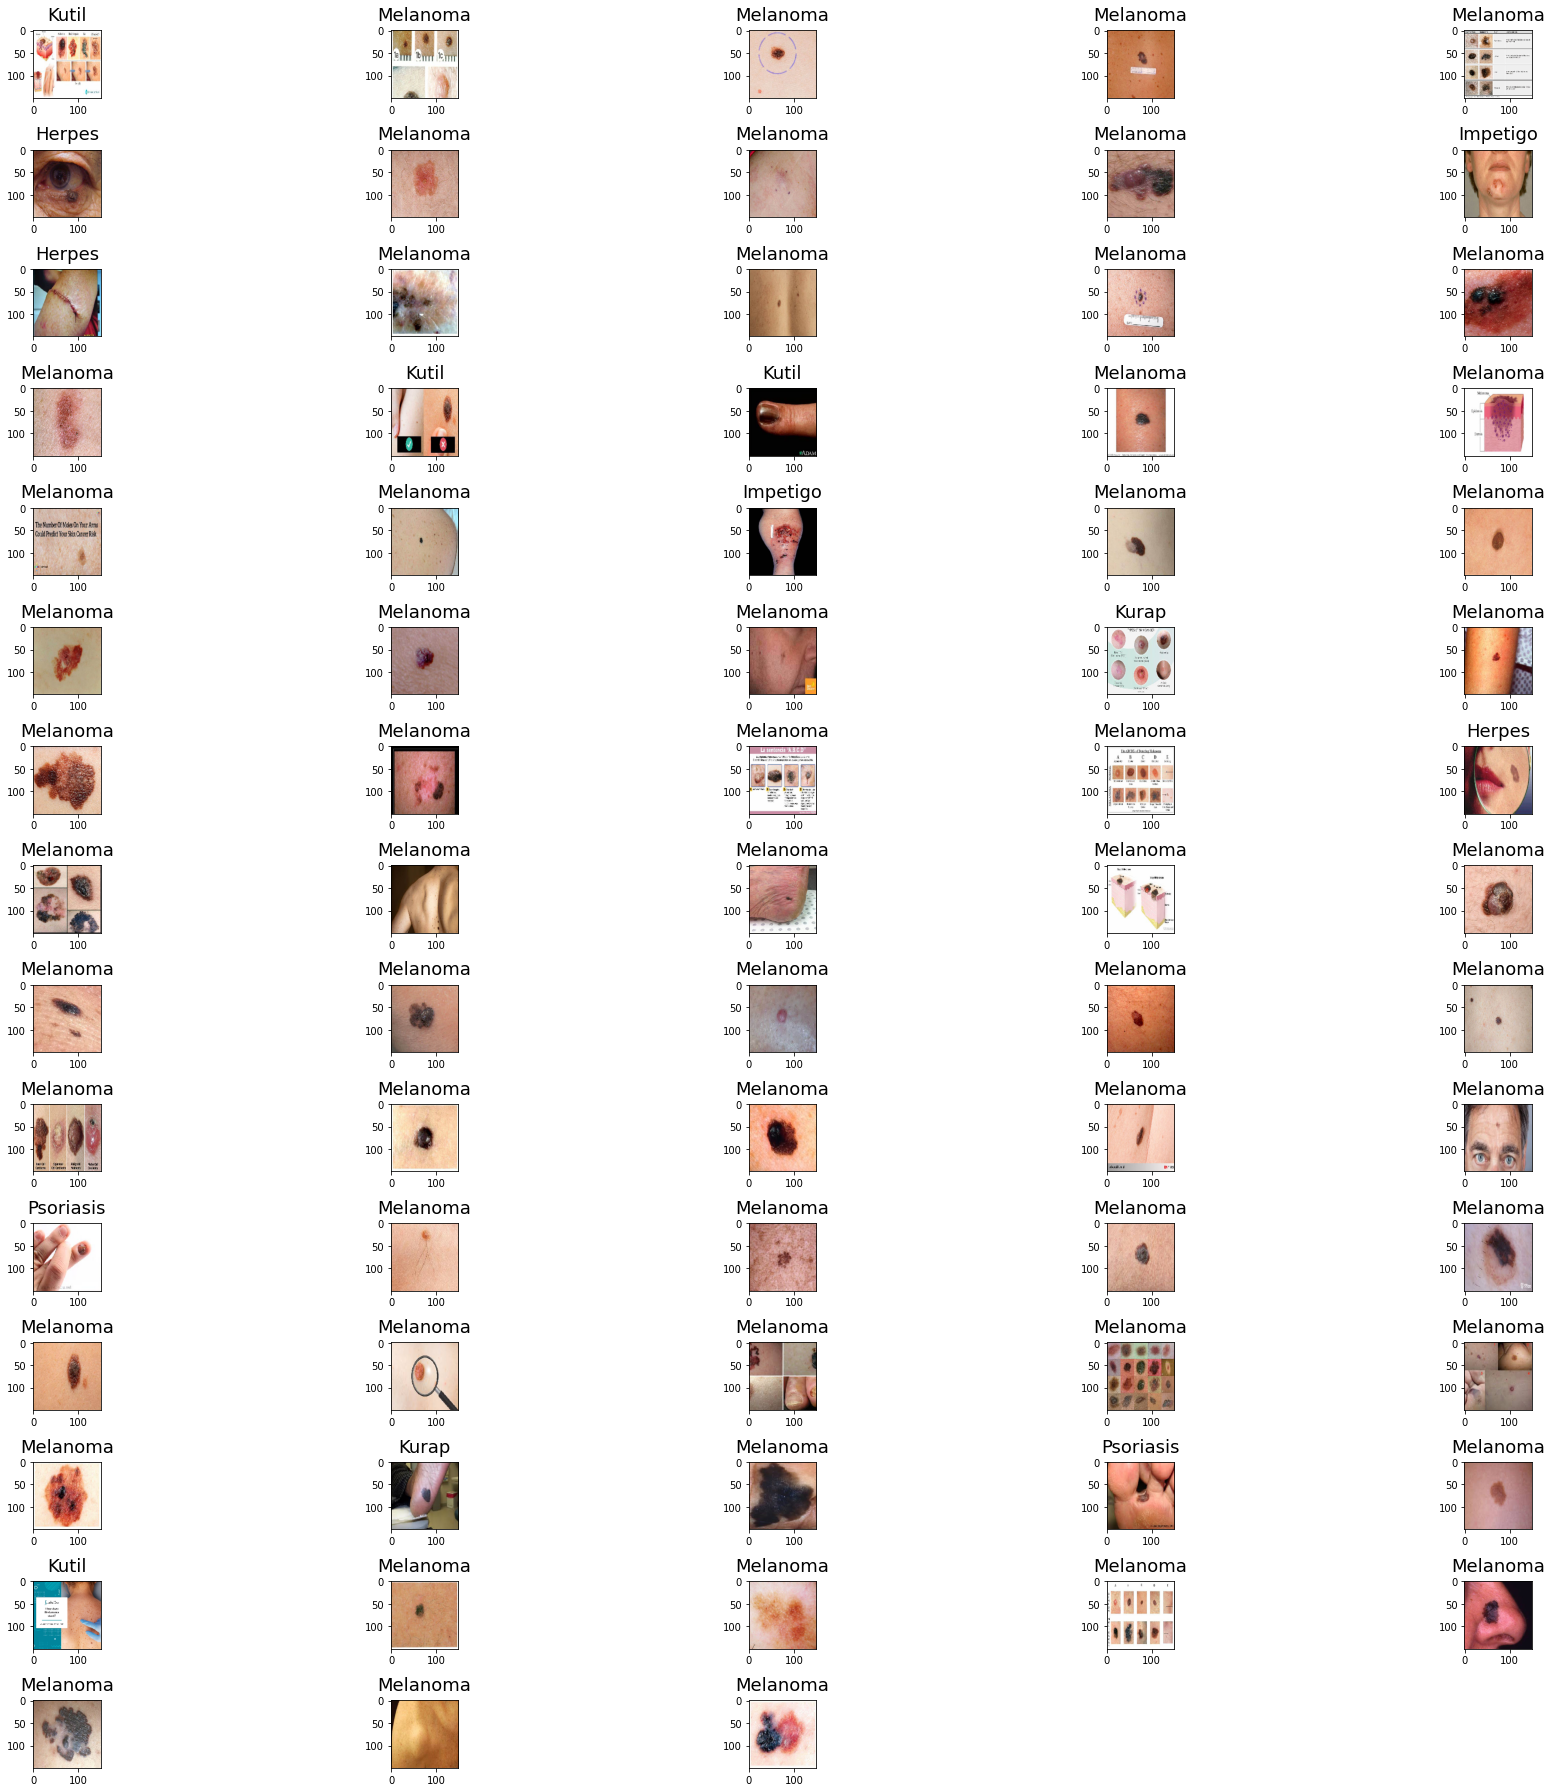

In [60]:
# Prediksi gambar dari folder Semur Jengkol

predict_dir('/content/drive/MyDrive/SBP/DATASET2/test/Melanoma',model)

1/1 [==============================] - 5s 5s/step


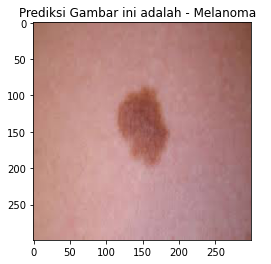

In [61]:
# Prediksi gambar gado-gado 

predict_image('/content/drive/MyDrive/SBP/DATASET2/test/Melanoma/Melanoma (672).jpg',model)

Saving latihkurap.jpg to latihkurap.jpg
1/1 [==============================] - 0s 42ms/step
Gambar ini adalah Kurap


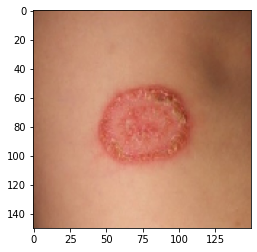

In [63]:
from google.colab import files
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image



# get input image 
uploaded = files.upload()



for fn in uploaded.keys():
  path = fn

# read image file using cv2
img = image.load_img(path, target_size=(150, 150))
imgplot = plt.imshow(img)
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
prediction = np.argmax(loaded_model.predict(img), axis=1)

if(prediction==0):
  print("Gambar ini adalah Cacar Air")
elif(prediction==1):
  print("Gambar ini adalah Herpes")
elif(prediction==2):
  print("Gambar ini adalah Impetigo")
elif(prediction==3):
  print("Gambar ini adalah Kurap")
elif(prediction==4):
  print("Gambar ini adalah Kutil")
elif(prediction==5):
  print("Gambar ini adalah Melanoma")
elif(prediction==6):
  print("Gambar ini adalah  Psoriasis")
elif(prediction==7):
  print("Gambar ini adalah Vitiligo")